- dataset: https://www.kaggle.com/datasets/outliersloop/footballyolov8
- yolov8 github: https://github.com/ultralytics/ultralytics
- yolov8 docs: https://docs.ultralytics.com/quickstart/

In [1]:

# Pip install (recommended)

%pip install ultralytics

#!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
#!sudo apt-get -y install cudnn9-cuda-11
#!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64/cuda-keyring_1.1-1_all.deb
#!sudo dpkg -i cuda-keyring_1.1-1_all.deb
#!sudo apt-get update
#!sudo apt-get -y install cuda-toolkit-12-3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.2/721.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [2]:
pip install albumentations

In [3]:
import ultralytics


# Creating train-val split

In [24]:
## importing required libraries
"""import os
import shutil
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm"""

'import os\nimport shutil\nimport random\n\n!pip install tqdm --upgrade\nfrom tqdm.notebook import tqdm'

In [4]:
## connecting to the google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Drive dan rar çıkarma kodu

In [5]:
!mkdir /content/Yolov8
!cp /content/drive/MyDrive/yolo_mix_2.rar /content/

!pip install rarfile
import rarfile

with rarfile.RarFile("/content/yolo_mix_2.rar", "r") as rar:
    rar.extractall("/content/Yolov8")

Train ve val. kasörleri oluşturma işlemi

In [7]:
"""train_path_img = "./yolodata/images/train/"
train_path_label = "./yolodata/labels/train/"
val_path_img = "./yolodata/images/val/"
val_path_label = "./yolodata/labels/val/"
test_path = "./yolodata/test/"""

'train_path_img = "./yolodata/images/train/"\ntrain_path_label = "./yolodata/labels/train/"\nval_path_img = "./yolodata/images/val/"\nval_path_label = "./yolodata/labels/val/"\ntest_path = "./yolodata/test/'

Githup dan yolov8 modelini Clone etme işlemi

In [6]:
!git clone https://github.com/ultralytics/ultralytics.git
%cd ultralytics
!pip install -e .


Cloning into 'ultralytics'...
remote: Enumerating objects: 22963, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (190/190), done.
remote: Total 22963 (delta 118), reused 121 (delta 50), pack-reused 22723
Receiving objects: 100% (22963/22963), 13.70 MiB | 22.27 MiB/s, done.
Resolving deltas: 100% (16031/16031), done.
/content/ultralytics
Obtaining file:///content/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ultralytics (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.1.27-0.editable-py3-none-any.whl size=22671 sha256=632129cc91477cbc995ad1872cd30a87e21cddb7a74aff9606d99f99b165c036
  Stored in directory: /tmp/pip-ephem-wheel-cache-mkw4fptb/wheels/9a/cd/d5/95912172899f8ec640166ff6eef49156b1b00d6b2ade4a3cb1
Successfully b

train ve test dosyaları oluşturma kısmı

In [9]:
"""os.makedirs(train_path_img, exist_ok = True)
os.makedirs(train_path_label, exist_ok = True)
os.makedirs(val_path_img, exist_ok = True)
os.makedirs(val_path_label, exist_ok = True)
"""

'os.makedirs(train_path_img, exist_ok = True)\nos.makedirs(train_path_label, exist_ok = True)\nos.makedirs(val_path_img, exist_ok = True)\nos.makedirs(val_path_label, exist_ok = True)\n'

In [10]:
'''
Split the dataset into train and test and creates the train.txt and test.tx with
the respective path of the images in each folder
'''

"""def train_test_split(path,neg_path=None, split = 0.2):
    print("------ PROCESS STARTED -------")


    files = list(set([name[:-4] for name in os.listdir(path)])) ## removing duplicate names i.e. counting only number of images


    print (f"--- This folder has a total number of {len(files)} images---")
    random.seed(42)
    random.shuffle(files)

    test_size = int(len(files) * split)
    train_size = len(files) - test_size


    ## creating required directories
    os.makedirs(train_path_img, exist_ok = True)
    os.makedirs(train_path_label, exist_ok = True)
    os.makedirs(val_path_img, exist_ok = True)
    os.makedirs(val_path_label, exist_ok = True)


    ### ----------- copying images to train folder
    for filex in tqdm(files[:train_size]):
      if filex == 'classes':
          continue
      shutil.copy2(path + filex +'.jpg',f"{train_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex +'.txt', f"{train_path_label}/" + filex + '.txt')



    print(f"------ Training data created with 80% split {len(files[:train_size])} images -------")

    if neg_path:
        neg_images = list(set([name[:-4] for name in os.listdir(neg_path)])) ## removing duplicate names i.e. counting only number of images
        for filex in tqdm(neg_images):
            shutil.copy2(neg_path+filex+ ".jpg", f"{train_path_img}/" + filex + '.jpg')

        print(f"------ Total  {len(neg_images)} negative images added to the training data -------")

        print(f"------ TOTAL Training data created with {len(files[:train_size]) + len(neg_images)} images -------")



    ### copytin images to validation folder
    for filex in tqdm(files[train_size:]):
      if filex == 'classes':
          continue
      # print("running")
      shutil.copy2(path + filex + '.jpg', f"{val_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{val_path_label}/" + filex + '.txt')

    print(f"------ Testing data created with a total of {len(files[train_size:])} images ----------")

    print("------ TASK COMPLETED -------")

## spliting the data into train-test and creating train.txt and test.txt files
# train_test_split('/content/drive/MyDrive/custom_notebooks/yolo_data/')

### for label_tag
train_test_split('/content/drive/MyDrive/yolov8/dataset2/') ### without negative images
# train_test_split('./data/','./negative_images/') ### if you want to feed negative images"""

'def train_test_split(path,neg_path=None, split = 0.2):\n    print("------ PROCESS STARTED -------")\n\n\n    files = list(set([name[:-4] for name in os.listdir(path)])) ## removing duplicate names i.e. counting only number of images\n\n\n    print (f"--- This folder has a total number of {len(files)} images---")\n    random.seed(42)\n    random.shuffle(files)\n\n    test_size = int(len(files) * split)\n    train_size = len(files) - test_size\n\n\n    ## creating required directories\n    os.makedirs(train_path_img, exist_ok = True)\n    os.makedirs(train_path_label, exist_ok = True)\n    os.makedirs(val_path_img, exist_ok = True)\n    os.makedirs(val_path_label, exist_ok = True)\n\n\n    ### ----------- copying images to train folder\n    for filex in tqdm(files[:train_size]):\n      if filex == \'classes\':\n          continue\n      shutil.copy2(path + filex +\'.jpg\',f"{train_path_img}/" + filex + \'.jpg\' )\n      shutil.copy2(path + filex +\'.txt\', f"{train_path_label}/" + filex

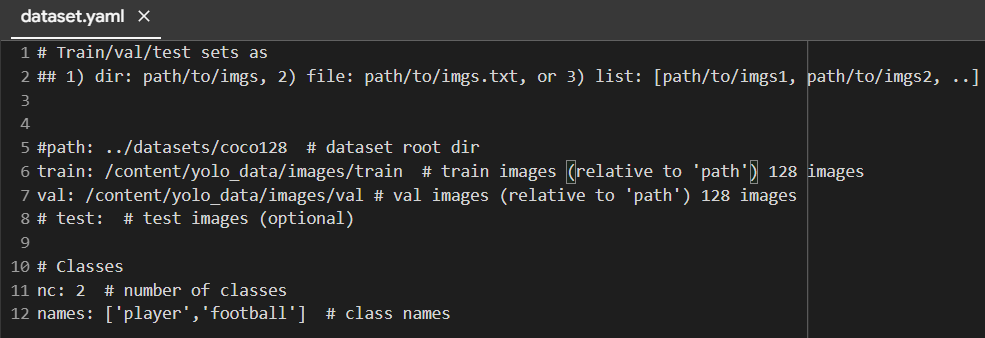

In [7]:
import ultralytics
#ultralytics.checks()

# Command Line Interface:


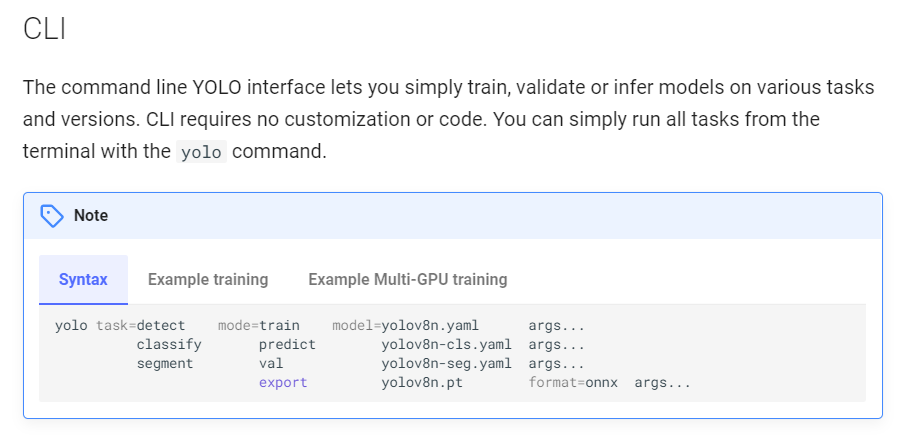

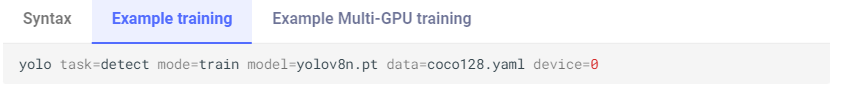

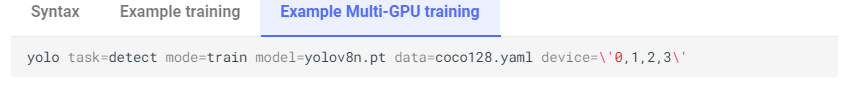

## Training

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/drive/MyDrive/yolov8/dataset2.yaml epochs=50 imgsz=320 batch=128 project=/content/drive/MyDrive/yolov8/training_results_inci name=save_model_inci

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/yolov8/dataset2.yaml, epochs=50, time=None, patience=100, batch=128, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolov8/training_results_inci, name=save_model_inci4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, 

#Eğitilmiş model üzerinde örnek resim yolu vererek detection işlemi yapma

## Inferencing

In [13]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/training_results_inci/save_model_inci4/weights/best.pt conf=0.20 source=/content/drive/MyDrive/yolov8/test_images

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/content/ultralytics/ultralytics/cfg/__init__.py", line 541, in entrypoint
    model = YOLO(model, task=task)
  File "/content/ultralytics/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/content/ultralytics/ultralytics/engine/model.py", line 142, in __init__
    self._load(model, task=task)
  File "/content/ultralytics/ultralytics/engine/model.py", line 229, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/content/ultralytics/ultralytics/nn/tasks.py", line 788, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/content/ultralytics/ultralytics/nn/tasks.py", line 714, in torch_safe_load
    ckpt = torch.load(file, map_location="cpu")
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 998, in load

#Model çıktılarını Kopyalamak

In [14]:
!cp -r /content/runs/detect/predict /content/drive/MyDrive/yolov8/output

cp: cannot stat '/content/runs/detect/predict': No such file or directory


### inferencing on video


In [15]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/training_results/football/weights/best.pt conf=0.77 source=/content/drive/MyDrive/yolov8/vid2

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/content/ultralytics/ultralytics/cfg/__init__.py", line 541, in entrypoint
    model = YOLO(model, task=task)
  File "/content/ultralytics/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/content/ultralytics/ultralytics/engine/model.py", line 142, in __init__
    self._load(model, task=task)
  File "/content/ultralytics/ultralytics/engine/model.py", line 229, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/content/ultralytics/ultralytics/nn/tasks.py", line 788, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/content/ultralytics/ultralytics/nn/tasks.py", line 714, in torch_safe_load
    ckpt = torch.load(file, map_location="cpu")
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 998, in load

In [16]:
!cp -r /content/runs/detect/predict2 /content/drive/MyDrive/yolov8/output

cp: cannot stat '/content/runs/detect/predict2': No such file or directory


In [17]:
# !yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/training_results/football2/weights/best.pt conf=0.5 source=/content/drive/MyDrive/yolov8/videos

In [18]:
# !cp -r /content/runs/detect/predict3 /content/drive/MyDrive/yolov8/output

## Export the model -- In progress

Export a YOLOv8 model to any supported format with the `format` argument, i.e. `format=onnx`.

Format                  | `format=...**bold text**`         | Model
---                     | ---                       | ---
PyTorch                 | -                         | yolov8n.pt
TorchScript             | `torchscript`             | yolov8n.torchscript
ONNX                    | `onnx`                    | yolov8n.onnx
OpenVINO                | `openvino`                | yolov8n_openvino_model/
TensorRT                | `engine`                  | yolov8n.engine
CoreML                  | `coreml`                  | yolov8n.mlmodel
TensorFlow SavedModel   | `saved_model`             | yolov8n_saved_model/
TensorFlow GraphDef     | `pb`                      | yolov8n.pb
TensorFlow Lite         | `tflite`                  | yolov8n.tflite
TensorFlow Edge TPU     | `edgetpu`                 | yolov8n_edgetpu.tflite
TensorFlow.js           | `tfjs`                    | yolov8n_web_model/
PaddlePaddle            | `paddle`                  | yolov8n_paddle_model/

In [19]:
!yolo mode=export model=/content/drive/MyDrive/yolov8/training_results/save_model/weights/best.pt format=onnx

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/content/ultralytics/ultralytics/cfg/__init__.py", line 541, in entrypoint
    model = YOLO(model, task=task)
  File "/content/ultralytics/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/content/ultralytics/ultralytics/engine/model.py", line 142, in __init__
    self._load(model, task=task)
  File "/content/ultralytics/ultralytics/engine/model.py", line 229, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/content/ultralytics/ultralytics/nn/tasks.py", line 788, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/content/ultralytics/ultralytics/nn/tasks.py", line 714, in torch_safe_load
    ckpt = torch.load(file, map_location="cpu")
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 998, in load